# Exploratory Analysis of Exam Test Score Data

The dataset analysed is available at Kaggle via: https://www.kaggle.com/datasets/whenamancodes/students-performance-in-exams  
This notebook is intended to demonstrate initial exploration of a simple data set, some plotting and graphical analysis, and lead into a deeper dive in a separate future notebook.

All analysis is performed using Python.

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#Read the data set into a pandas DataFrame
data = pd.read_csv("data//exams.csv")

In [3]:
#Quick visual inspection of the data
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68


In [4]:
#Key data statistics
data.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,66.396000,69.002000,67.738000
std,15.402871,14.737272,15.600985
min,13.000000,27.000000,23.000000
25%,56.000000,60.000000,58.000000
50%,66.500000,70.000000,68.000000
75%,77.000000,79.000000,79.000000
max,100.000000,100.000000,100.000000


In [5]:
#Rename some columns to easier to use names 
data.rename(columns={'race/ethnicity':'race',
                    'parental level of education':'parent_education',
                    'test preparation course':'test_prep'},inplace=True)

#visual inspection of changes
data.head()

,gender,race,parent_education,lunch,test_prep,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68


In [6]:
#For Loop to produce groupby means for the different categorical elements
for i in data.columns[0:5]:
    globals()['Data_mean_%s' % i] = data.groupby(by=i).mean()

In [7]:
#Print the new average scores in tabular form
print(Data_mean_gender)
print(Data_mean_race)
print(Data_mean_parent_education)
print(Data_mean_lunch)
print(Data_mean_test_prep)

        math score  reading score  writing score
gender                                          
female   63.196687      71.888199      71.708075
male     69.384913      66.305609      64.029014
         math score  reading score  writing score
race                                             
group A   65.215190      68.556962      66.974684
group B   63.170732      67.102439      65.736585
group C   63.130031      66.383901      64.523220
group D   69.267176      72.087786      72.259542
group E   74.465649      72.526718      70.213740
                    math score  reading score  writing score
parent_education                                            
associate's degree   69.536946      70.985222      70.113300
bachelor's degree    71.491071      74.008929      74.410714
high school          65.207921      67.400990      64.846535
master's degree      71.585714      75.428571      75.885714
some college         65.297297      68.045045      66.734234
some high school     60.701

In [8]:
#For Loop to produce groupby means for the different categorical elements
for i in data.columns[0:5]:
    globals()['Data_count_%s' % i] = data.groupby(by=i).count()

In [9]:
#Print the observations in each category in tabular form
print(Data_count_gender['math score'])
print('------')
print(Data_count_race['math score'])
print('------')
print(Data_count_parent_education['math score'])
print('------')
print(Data_count_lunch['math score'])
print('------')
print(Data_count_test_prep['math score'])

gender
female    483
male      517
Name: math score, dtype: int64
------
race
group A     79
group B    205
group C    323
group D    262
group E    131
Name: math score, dtype: int64
------
parent_education
associate's degree    203
bachelor's degree     112
high school           202
master's degree        70
some college          222
some high school      191
Name: math score, dtype: int64
------
lunch
free/reduced    348
standard        652
Name: math score, dtype: int64
------
test_prep
completed    335
none         665
Name: math score, dtype: int64


## Distribution Plots

Text(0.5, 1.0, 'Writing Score by Test Prep')

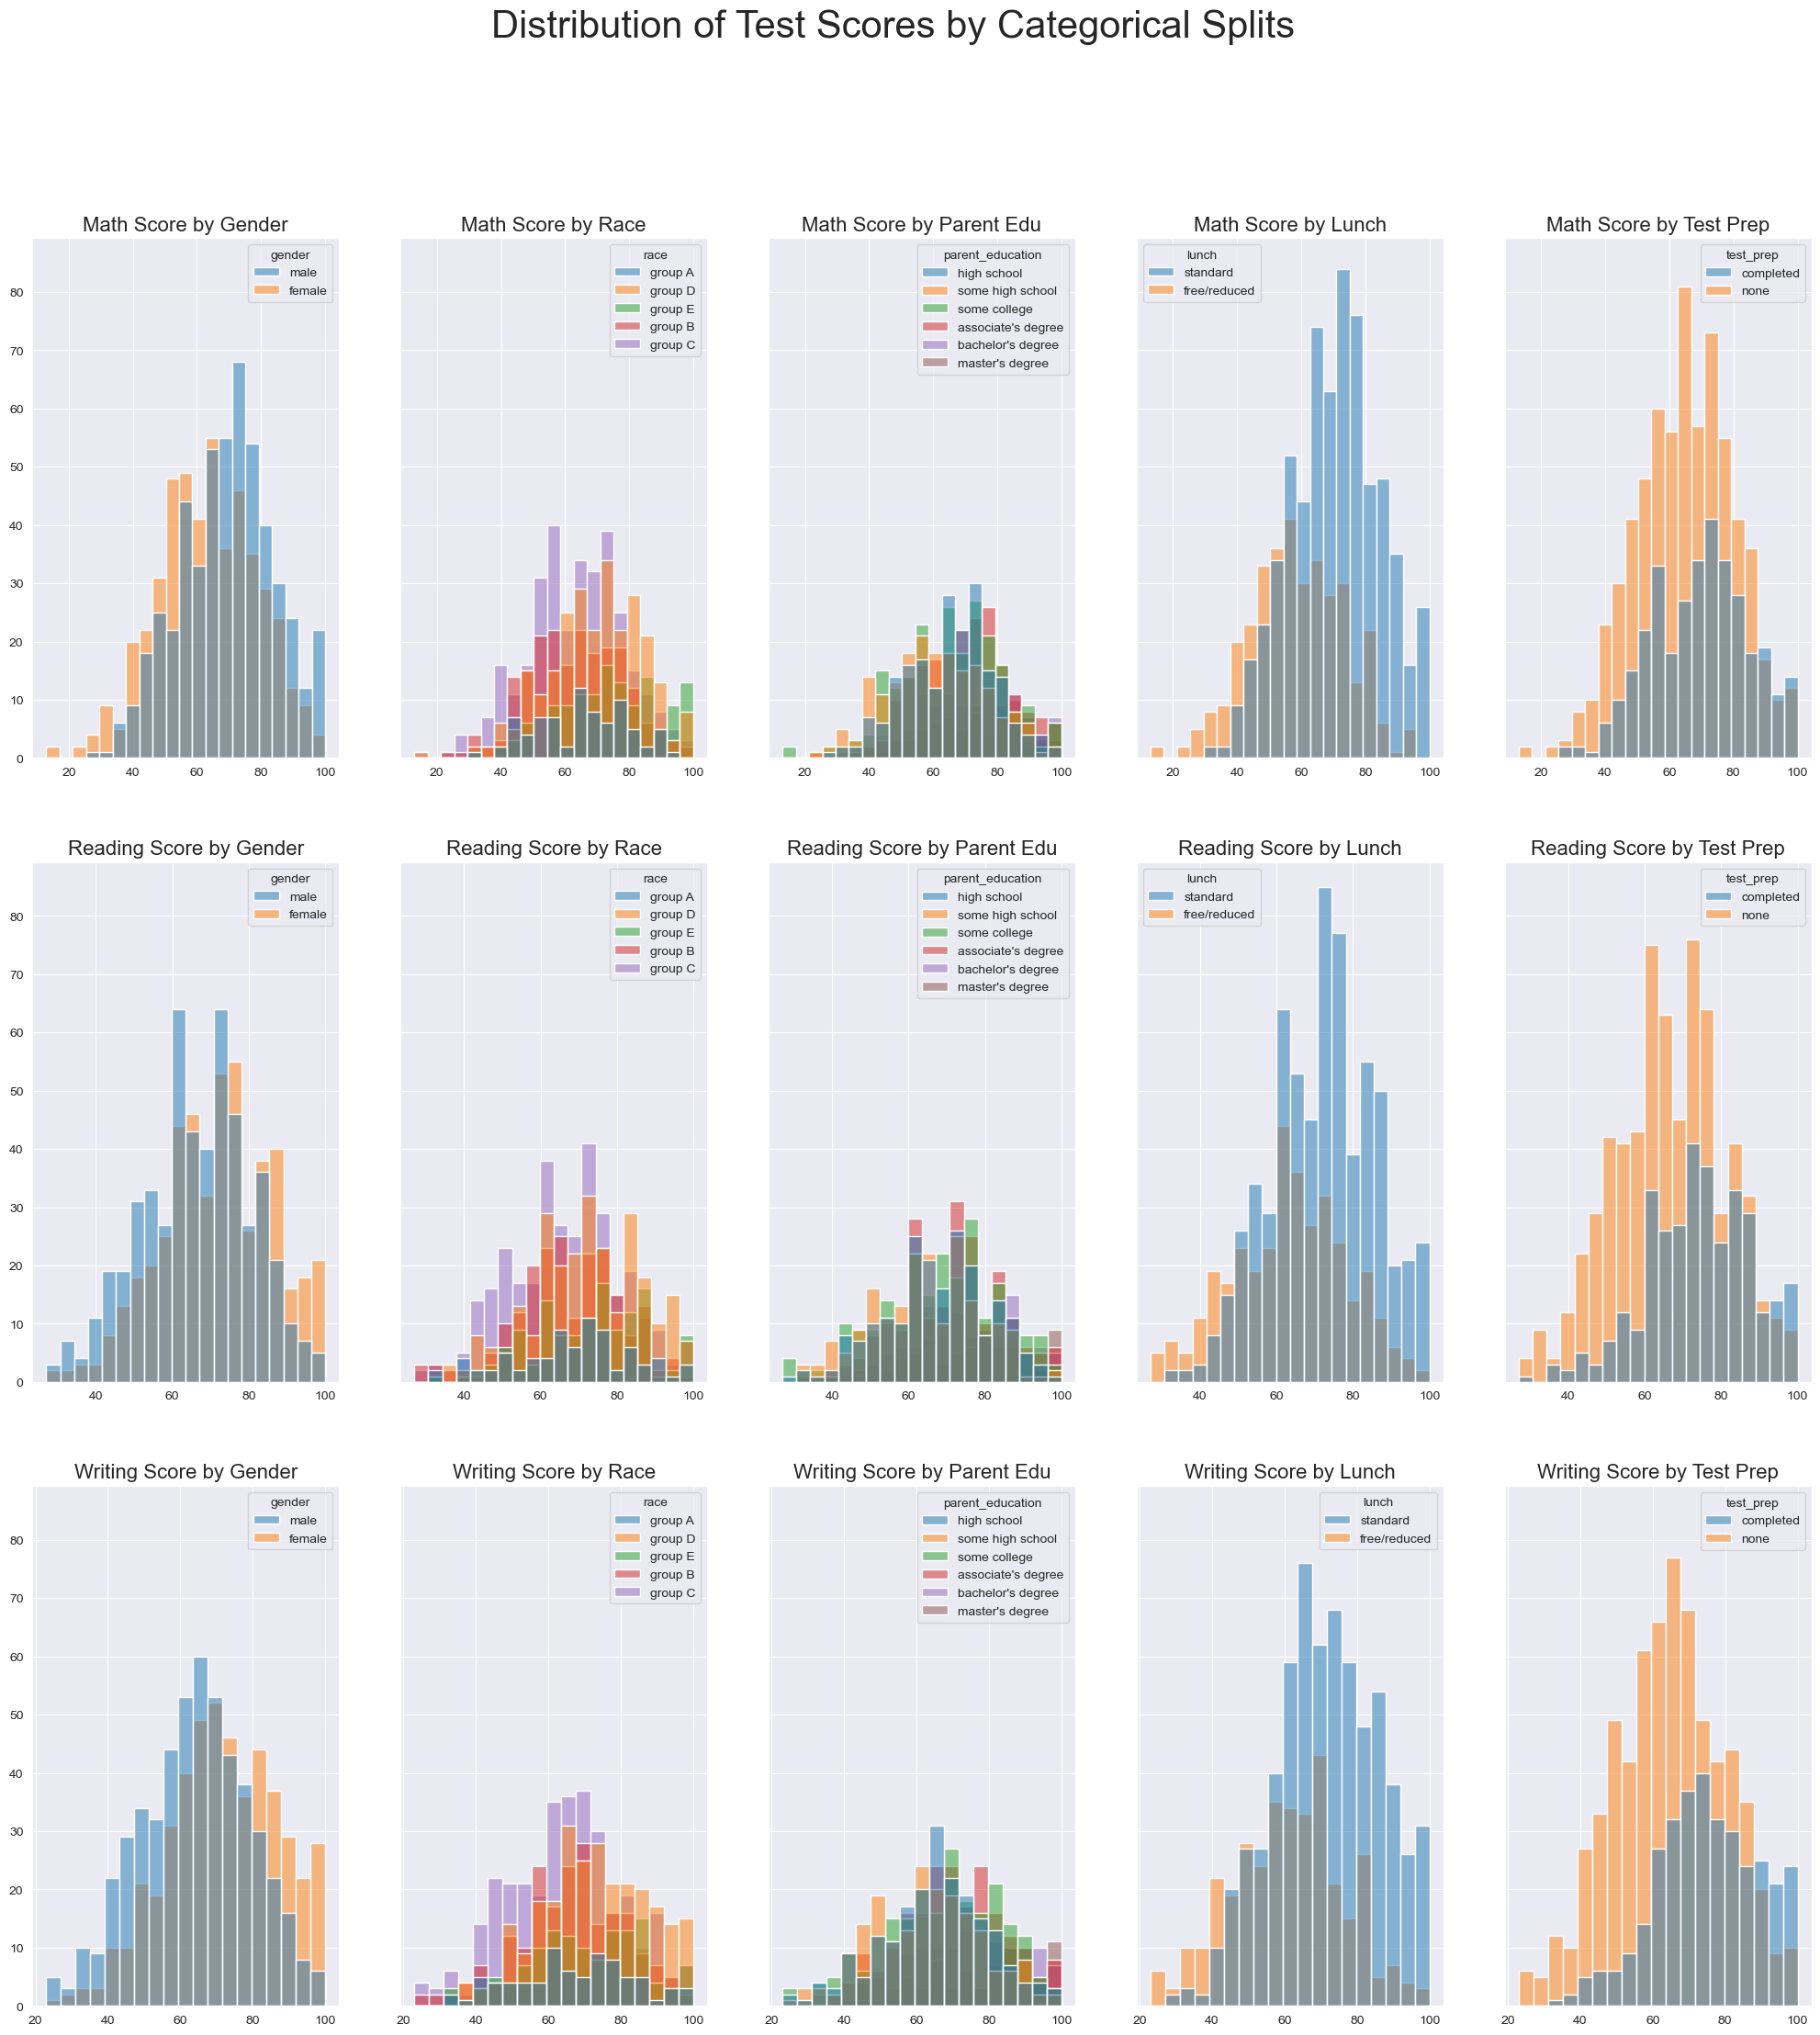

In [12]:
#Set DarkGrid style for easier viewing
sns.set_style("darkgrid")

fig, axes = plt.subplots(3, 5, figsize=(25, 25), sharey=True)
fig.suptitle('Distribution of Test Scores by Categorical Splits', size=30)


## DISTRIBUTION PLOTS FOR MATH SCORE
#Distribution Math score by Gender
sns.histplot(ax = axes[0,0],
            data = data,
            x='math score', 
            hue='gender')
axes[0,0].set(xlabel=None)
axes[0,0].set(ylabel=None)
axes[0,0].set_title('Math Score by Gender',size=16)

#Distribution Math score by Race
sns.histplot(ax = axes[0,1],
            data = data,
            x='math score', 
            hue='race')
axes[0,1].set(xlabel=None)
axes[0,1].set(ylabel=None)
axes[0,1].set_title('Math Score by Race',size=16)

#Distribution Math score by Parent Education Level
sns.histplot(ax = axes[0,2],
            data = data,
            x='math score', 
            hue='parent_education')
axes[0,2].set(xlabel=None)
axes[0,2].set(ylabel=None)
axes[0,2].set_title('Math Score by Parent Edu',size=16)

#Distribution Math score by Lunch
sns.histplot(ax = axes[0,3],
            data = data,
            x='math score', 
            hue='lunch')
axes[0,3].set(xlabel=None)
axes[0,3].set(ylabel=None)
axes[0,3].set_title('Math Score by Lunch',size=16)

#Distribution Math score by Test Preparation
sns.histplot(ax = axes[0,4],
            data = data,
            x='math score', 
            hue='test_prep')
axes[0,4].set(xlabel=None)
axes[0,4].set(ylabel=None)
axes[0,4].set_title('Math Score by Test Prep',size=16)


## DISTRIBUTION PLOTS FOR READING SCORE
#Distribution Reading score by Gender
sns.histplot(ax = axes[1,0],
            data = data,
            x='reading score', 
            hue='gender')
axes[1,0].set(xlabel=None)
axes[1,0].set(ylabel=None)
axes[1,0].set_title('Reading Score by Gender',size=16)

#Distribution reading score by Race
sns.histplot(ax = axes[1,1],
            data = data,
            x='reading score', 
            hue='race')
axes[1,1].set(xlabel=None)
axes[1,1].set(ylabel=None)
axes[1,1].set_title('Reading Score by Race',size=16)

#Distribution reading score by Parent Education Level
sns.histplot(ax = axes[1,2],
            data = data,
            x='reading score', 
            hue='parent_education')
axes[1,2].set(xlabel=None)
axes[1,2].set(ylabel=None)
axes[1,2].set_title('Reading Score by Parent Edu',size=16)

#Distribution reading score by Lunch
sns.histplot(ax = axes[1,3],
            data = data,
            x='reading score', 
            hue='lunch')
axes[1,3].set(xlabel=None)
axes[1,3].set(ylabel=None)
axes[1,3].set_title('Reading Score by Lunch',size=16)

#Distribution reading score by Test Preparation
sns.histplot(ax = axes[1,4],
            data = data,
            x='reading score', 
            hue='test_prep')
axes[1,4].set(xlabel=None)
axes[1,4].set(ylabel=None)
axes[1,4].set_title('Reading Score by Test Prep',size=16)


## DISTRIBUTION PLOTS FOR WRITING SCORE
#Distribution Writing score by Gender
sns.histplot(ax = axes[2,0],
            data = data,
            x='writing score', 
            hue='gender')
axes[2,0].set(xlabel=None)
axes[2,0].set(ylabel=None)
axes[2,0].set_title('Writing Score by Gender',size=16)

#Distribution writing score by Race
sns.histplot(ax = axes[2,1],
            data = data,
            x='writing score', 
            hue='race')
axes[2,1].set(xlabel=None)
axes[2,1].set(ylabel=None)
axes[2,1].set_title('Writing Score by Race',size=16)

#Distribution writing score by Parent Education Level
sns.histplot(ax = axes[2,2],
            data = data,
            x='writing score', 
            hue='parent_education')
axes[2,2].set(xlabel=None)
axes[2,2].set(ylabel=None)
axes[2,2].set_title('Writing Score by Parent Edu',size=16)

#Distribution writing score by Lunch
sns.histplot(ax = axes[2,3],
            data = data,
            x='writing score', 
            hue='lunch')
axes[2,3].set(xlabel=None)
axes[2,3].set(ylabel=None)
axes[2,3].set_title('Writing Score by Lunch',size=16)

#Distribution writing score by Test Preparation
sns.histplot(ax = axes[2,4],
            data = data,
            x='writing score', 
            hue='test_prep')
axes[2,4].set(xlabel=None)
axes[2,4].set(ylabel=None)
axes[2,4].set_title('Writing Score by Test Prep',size=16)

## Box Plots split by categories

Text(0.5, 1.0, 'Writing Score by Test Prep')

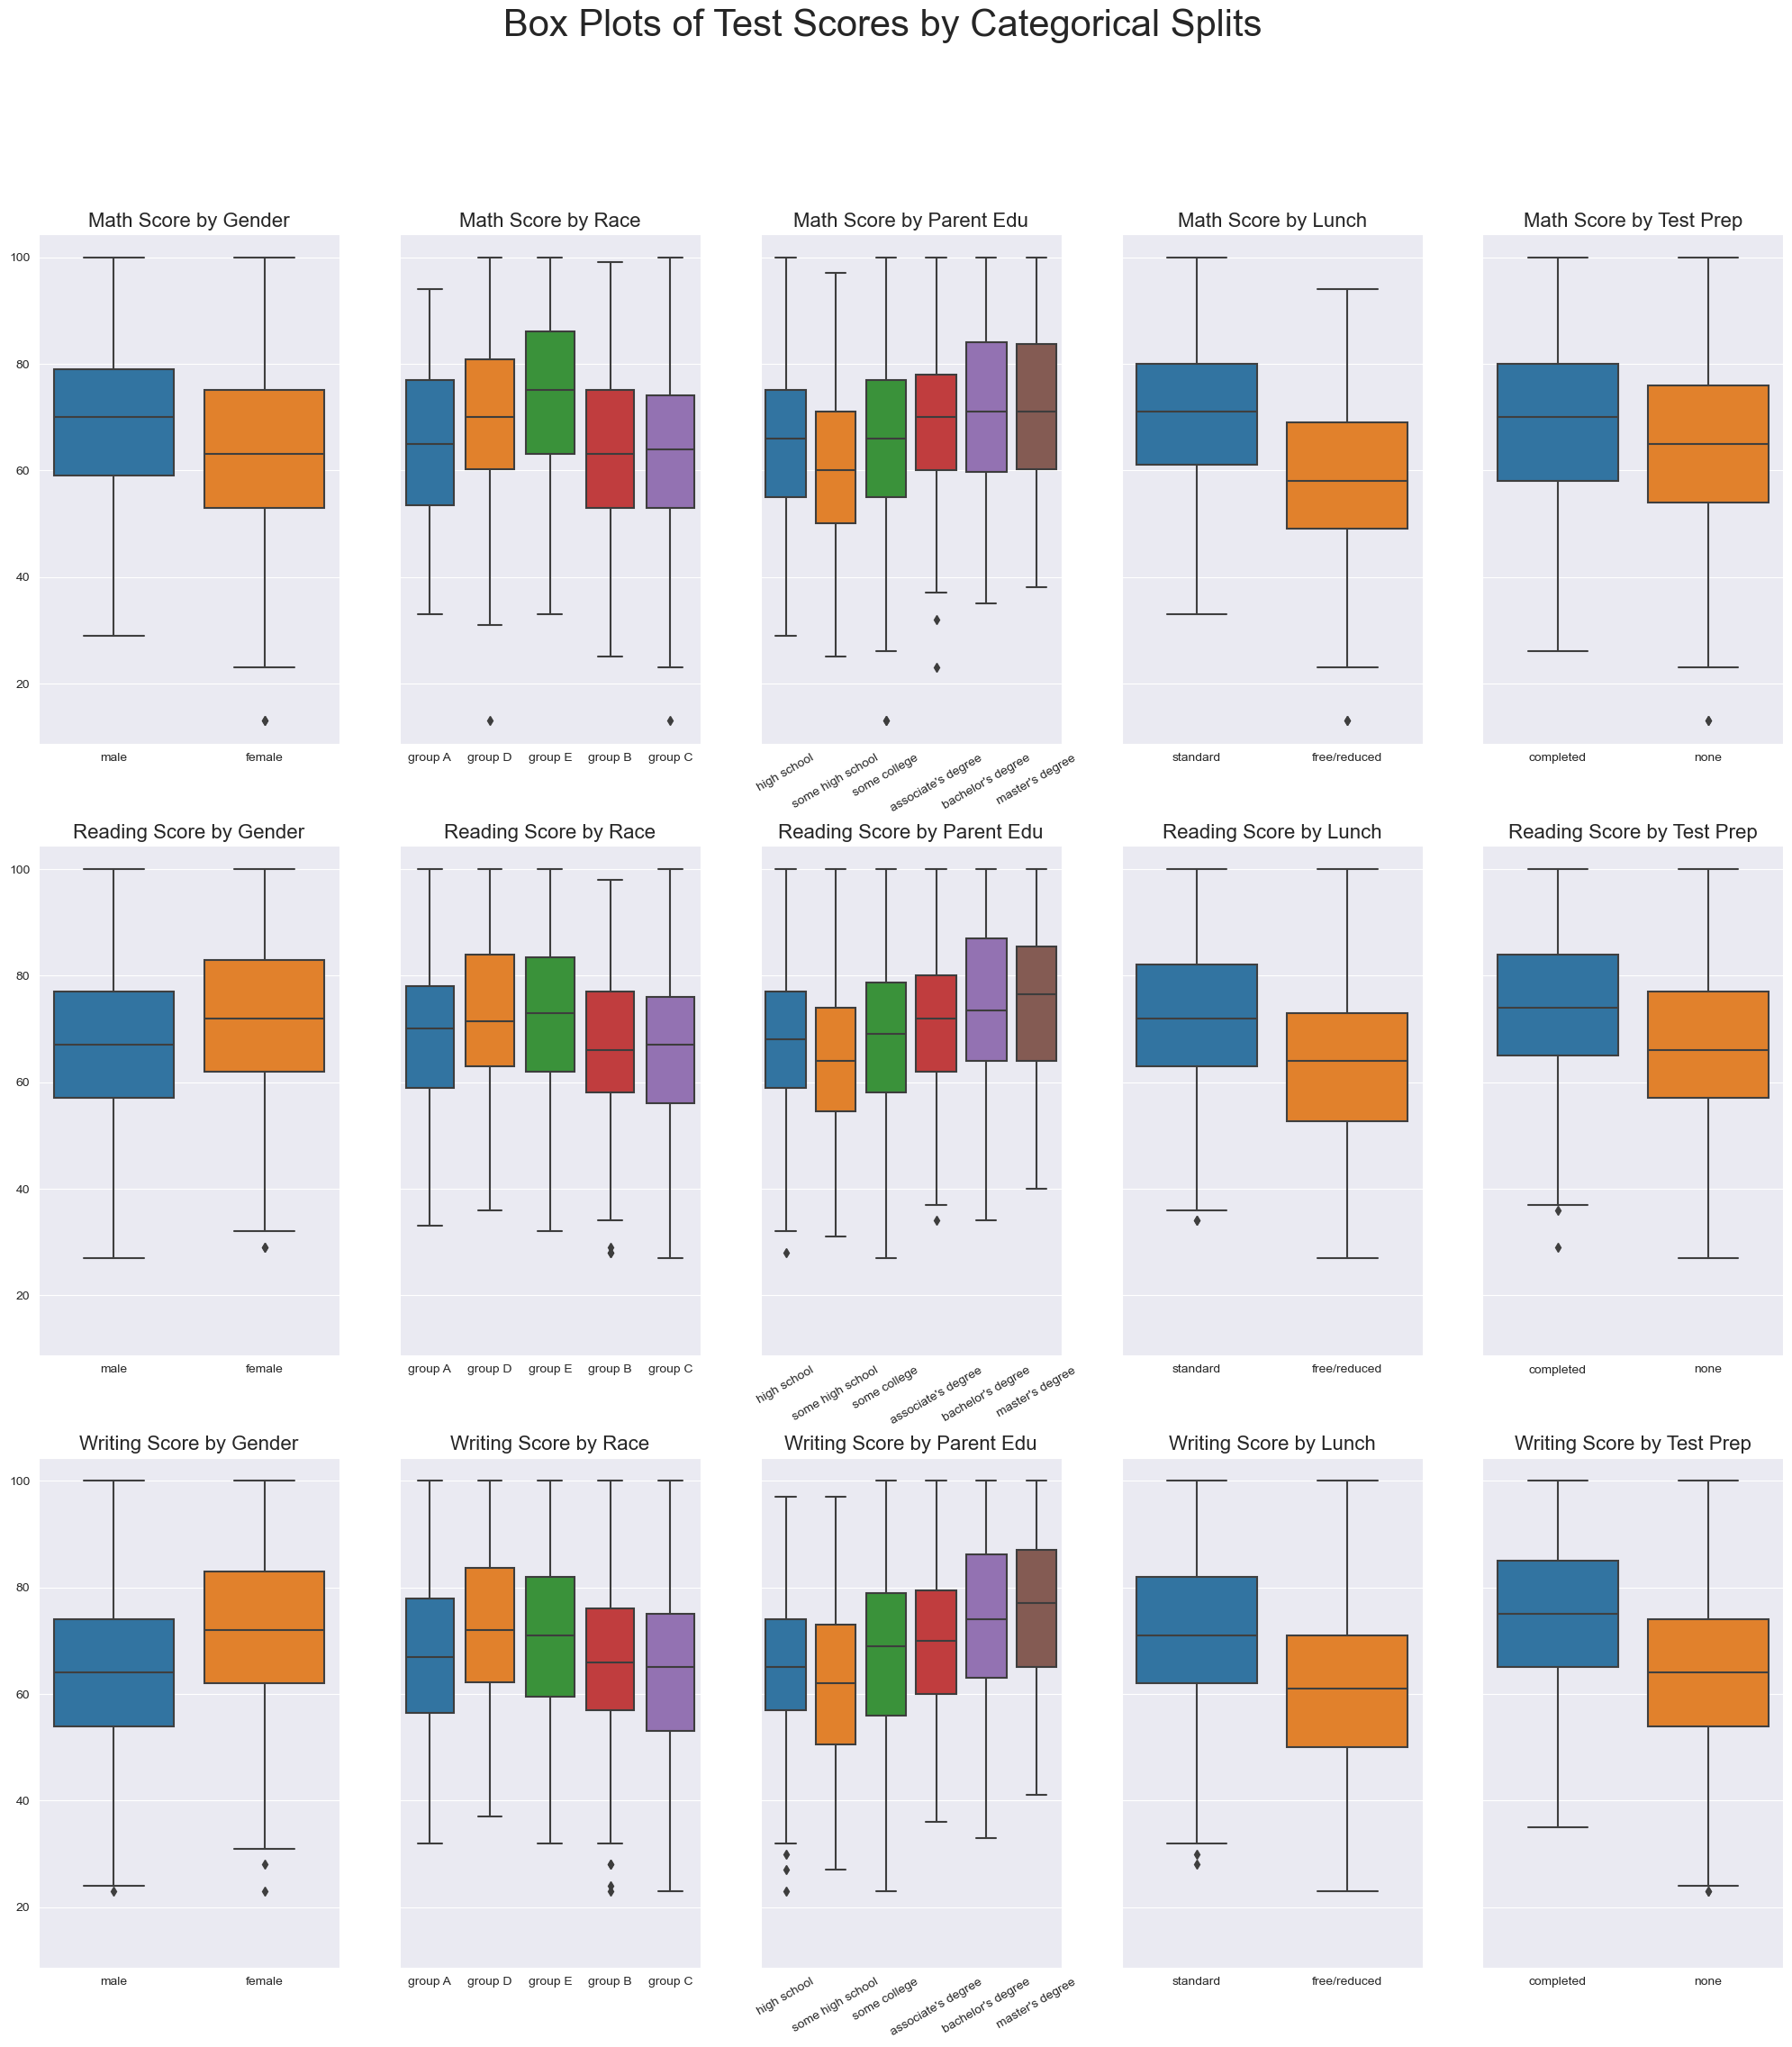

In [13]:
#Set DarkGrid style for easier viewing
sns.set_style("darkgrid")

fig, axes = plt.subplots(3, 5, figsize=(25, 25), sharey=True)
fig.suptitle('Box Plots of Test Scores by Categorical Splits', size=30)

## BOX PLOTS OF MATH SCORE
# Box plot Math Score by Gender
sns.boxplot(ax = axes[0,0],
            x = 'gender',
            y = 'math score',
            data = data)
axes[0,0].set(xlabel=None)
axes[0,0].set(ylabel=None)
axes[0,0].set_title('Math Score by Gender',size=16)

# Box plot Math Score by Race
sns.boxplot(ax = axes[0,1],
            x = 'race',
            y = 'math score',
            data = data)
axes[0,1].set(xlabel=None)
axes[0,1].set(ylabel=None)
axes[0,1].set_title('Math Score by Race',size=16)

# Box plot Math Score by Parent Education Level
##Change Rotation of xticks on this plot
sns.boxplot(ax = axes[0,2],
            x = 'parent_education',
            y = 'math score',
            data = data)
axes[0,2].set(xlabel=None)
axes[0,2].set(ylabel=None)
axes[0,2].set_xticklabels(axes[0,2].get_xticklabels(), rotation=30)
axes[0,2].set_title('Math Score by Parent Edu',size=16)

# Box plot Math Score by Lunch
sns.boxplot(ax = axes[0,3],
            x = 'lunch',
            y = 'math score',
            data = data)
axes[0,3].set(xlabel=None)
axes[0,3].set(ylabel=None)
axes[0,3].set_title('Math Score by Lunch',size=16)

# Box plot Math Score by Test Preparation
sns.boxplot(ax = axes[0,4],
            x = 'test_prep',
            y = 'math score',
            data = data)
axes[0,4].set(xlabel=None)
axes[0,4].set(ylabel=None)
axes[0,4].set_title('Math Score by Test Prep',size=16)




## BOX PLOTS OF READING SCORE
# Box plot Reading Score by Gender
sns.boxplot(ax = axes[1,0],
            x = 'gender',
            y = 'reading score',
            data = data)
axes[1,0].set(xlabel=None)
axes[1,0].set(ylabel=None)
axes[1,0].set_title('Reading Score by Gender',size=16)

# Box plot Reading Score by Race
sns.boxplot(ax = axes[1,1],
            x = 'race',
            y = 'reading score',
            data = data)
axes[1,1].set(xlabel=None)
axes[1,1].set(ylabel=None)
axes[1,1].set_title('Reading Score by Race',size=16)

# Box plot Reading Score by Parent Education Level
##Change Rotation of xticks on this plot
sns.boxplot(ax = axes[1,2],
            x = 'parent_education',
            y = 'reading score',
            data = data)
axes[1,2].set(xlabel=None)
axes[1,2].set(ylabel=None)
axes[1,2].set_xticklabels(axes[0,2].get_xticklabels(), rotation=30)
axes[1,2].set_title('Reading Score by Parent Edu',size=16)

# Box plot Reading Score by Lunch
sns.boxplot(ax = axes[1,3],
            x = 'lunch',
            y = 'reading score',
            data = data)
axes[1,3].set(xlabel=None)
axes[1,3].set(ylabel=None)
axes[1,3].set_title('Reading Score by Lunch',size=16)

# Box plot Reading Score by Test Preparation
sns.boxplot(ax = axes[1,4],
            x = 'test_prep',
            y = 'reading score',
            data = data)
axes[1,4].set(xlabel=None)
axes[1,4].set(ylabel=None)
axes[1,4].set_title('Reading Score by Test Prep',size=16)




## BOX PLOTS OF WRITING SCORE
# Box plot Writing Score by Gender
sns.boxplot(ax = axes[2,0],
            x = 'gender',
            y = 'writing score',
            data = data)
axes[2,0].set(xlabel=None)
axes[2,0].set(ylabel=None)
axes[2,0].set_title('Writing Score by Gender',size=16)

# Box plot Writing Score by Race
sns.boxplot(ax = axes[2,1],
            x = 'race',
            y = 'writing score',
            data = data)
axes[2,1].set(xlabel=None)
axes[2,1].set(ylabel=None)
axes[2,1].set_title('Writing Score by Race',size=16)

# Box plot Writing Score by Parent Education Level
sns.boxplot(ax = axes[2,2],
            x = 'parent_education',
            y = 'writing score',
            data = data)
axes[2,2].set(xlabel=None)
axes[2,2].set(ylabel=None)
axes[2,2].set_xticklabels(axes[0,2].get_xticklabels(), rotation=30)
axes[2,2].set_title('Writing Score by Parent Edu',size=16)

# Box plot Writing Score by Lunch
sns.boxplot(ax = axes[2,3],
            x = 'lunch',
            y = 'writing score',
            data = data)
axes[2,3].set(xlabel=None)
axes[2,3].set(ylabel=None)
axes[2,3].set_title('Writing Score by Lunch',size=16)

# Box plot Writing Score by Test Preparation
sns.boxplot(ax = axes[2,4],
            x = 'test_prep',
            y = 'writing score',
            data = data)
axes[2,4].set(xlabel=None)
axes[2,4].set(ylabel=None)
axes[2,4].set_title('Writing Score by Test Prep',size=16)


Did one Group do more Test Preparation than another?


In [25]:
## Produce bar plots of these
data[['gender','test_prep']].groupby(by='gender').count()

#data[['race','test_prep']].groupby(by='race').count()

,test_prep
gender,
female,483
male,517
